----------------------------------------------------
KNN based handwritten number recognition model 
-------------------------------

---------------------------
importing needed libraries


In [1]:
import numpy as np                  
import matplotlib.pyplot as plt   
import cv2 
import random  
from keras.datasets import mnist 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import asarray

------------
Loading dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


-------------------------
Visualize the data

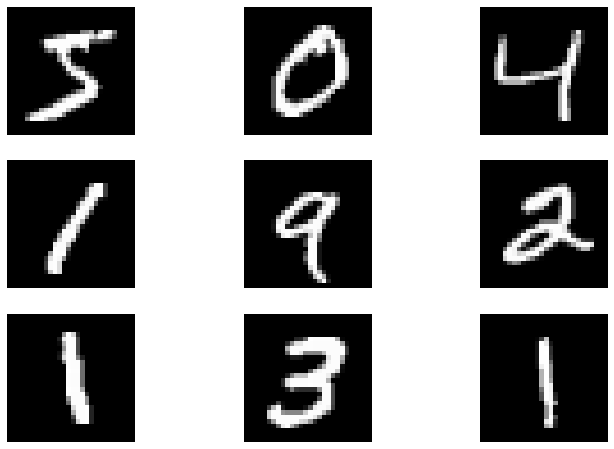

In [3]:
plt.figure(figsize=(12, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(X_train[i], cmap="gray")
    plt.axis("off")

plt.show()

Index:  32867
Training Set: 
Label: 0


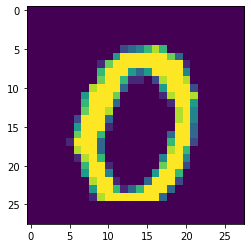

In [4]:
#train dataset visualization
index = random.randint(0, 60000)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_train[index])
img = np.asarray(X_train[index])
plt.imshow(img)
plt.show()

Index:  5461
Training Set: 
Label: 1


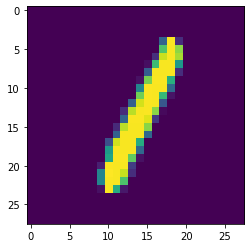

In [5]:
#test dataset visualization
index = random.randint(0, 10000)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index])
plt.imshow(img)
plt.show()

-------------------------
Tuning KNN model

In [6]:
score = []
for k in range(1, 9):
  print('When KNN with n_neighbors =',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
  pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))
  accuracy = accuracy_score(y_test, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("---------------")

When KNN with n_neighbors = 1
Accuracy:  0.9691
---------------
When KNN with n_neighbors = 2
Accuracy:  0.9627
---------------
When KNN with n_neighbors = 3
Accuracy:  0.9705
---------------
When KNN with n_neighbors = 4
Accuracy:  0.9682
---------------
When KNN with n_neighbors = 5
Accuracy:  0.9688
---------------
When KNN with n_neighbors = 6
Accuracy:  0.9677
---------------
When KNN with n_neighbors = 7
Accuracy:  0.9694
---------------
When KNN with n_neighbors = 8
Accuracy:  0.967
---------------


------------------------------
visualize the effect of n_neighbors

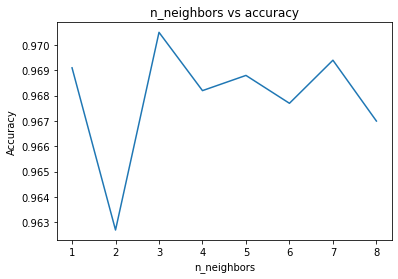

In [7]:
plt.plot(range(1,9), score)
plt.title('n_neighbors vs accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

----------------
Train our final KNN Model with n_neighbors=3

In [8]:
# Create KNN model and Training 
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)

--------------------------
Testing Model 

In [9]:
# Prediction using test dataset 
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))

In [10]:
# Final Accuracy and Confusion Matrix
print("Final Accuracy : {}".format(accuracy_score(y_test, y_pred)))
print("-----------------------")
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))

Final Accuracy : 0.9705
-----------------------
Confusion Matrix : 
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


----------------------
testing with manual input

In [18]:
def visualize_image(image, type):
    if(type=='imported'):
        plt.imshow(image, cmap='gray')
        plt.title("imported image")
        plt.show()
    elif(type=='formatted'):
        plt.imshow(image)
        plt.title("Formatted image based on MNIST")
        plt.show()
    else:
        print("Image Not Found ...")

In [27]:
def predict_manually(file):
    input_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    visualize_image(input_image, 'imported')
    print("-----------------------------")
    manual_test_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    manual_test_image = cv2.bitwise_not(manual_test_image)
    visualize_image(manual_test_image, 'formatted')
    print("-----------------------------")
    # Transform 2D ndarray to 3D ndarray
    test_data = manual_test_image.reshape((1, 28, 28))
    # Predict the manual input
    input_predict = classifier.predict(test_data.reshape(test_data.shape[0], 28*28))
    print("Predicted Value : {}".format(input_predict[0]))

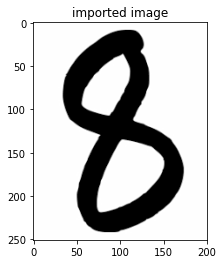

-----------------------------


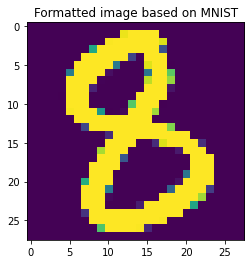

-----------------------------
Predicted Value : 8


In [28]:
# Enter correct path of the manual prediction image [JPG, JPEG, PNG]
file = r'test8.png'
predict_manually(file)